## Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Loading the Dataset

In [2]:
cancer = pd.read_csv(r"D:\ML-Classifier\Assignments\Dataset\Cancer-Dataset.csv")
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


__Dropping Unwanted Columnns__

In [3]:
data =cancer.drop('Unnamed: 32',axis=1)

### Handling Categorical Data

In [4]:
for i in data['diagnosis'].unique():
    if i=='M':
        data['diagnosis'].replace(i,1.0,inplace=True)
    elif i=='B':
        data['diagnosis'].replace(i,0.0,inplace=True)

In [5]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1.0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1.0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1.0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1.0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1.0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Correlation matrix

In [6]:
cor = data.corr()
cor

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


### Finding Columns with less correlation with the column to predict

In [7]:
drop_list=cor.index[cor['diagnosis']<0.7].tolist()
print(drop_list)

['id', 'texture_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'texture_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst']


__Dropping the unwanted columns__

In [8]:
data_n = data.drop(drop_list,axis=1)
print(data_n.shape)
data_n.head()

(569, 9)


,diagnosis,radius_mean,perimeter_mean,area_mean,concave points_mean,radius_worst,perimeter_worst,area_worst,concave points_worst
0,1.0,17.99,122.80,1001.0,0.14710,25.38,184.60,2019.0,0.2654
1,1.0,20.57,132.90,1326.0,0.07017,24.99,158.80,1956.0,0.1860
2,1.0,19.69,130.00,1203.0,0.12790,23.57,152.50,1709.0,0.2430
3,1.0,11.42,77.58,386.1,0.10520,14.91,98.87,567.7,0.2575
4,1.0,20.29,135.10,1297.0,0.10430,22.54,152.20,1575.0,0.1625


## Finding the correlation matrix for the new data

In [18]:
data_n.corr()

,diagnosis,radius_mean,perimeter_mean,area_mean,concave points_mean,radius_worst,perimeter_worst,area_worst,concave points_worst
diagnosis,1.000000,0.730029,0.742636,0.708984,0.776614,0.776454,0.782914,0.733825,0.793566
radius_mean,0.730029,1.000000,0.997855,0.987357,0.822529,0.969539,0.965137,0.941082,0.744214
perimeter_mean,0.742636,0.997855,1.000000,0.986507,0.850977,0.969476,0.970387,0.941550,0.771241
area_mean,0.708984,0.987357,0.986507,1.000000,0.823269,0.962746,0.959120,0.959213,0.722017
concave points_mean,0.776614,0.822529,0.850977,0.823269,1.000000,0.830318,0.855923,0.809630,0.910155
radius_worst,0.776454,0.969539,0.969476,0.962746,0.830318,1.000000,0.993708,0.984015,0.787424
perimeter_worst,0.782914,0.965137,0.970387,0.959120,0.855923,0.993708,1.000000,0.977578,0.816322
area_worst,0.733825,0.941082,0.941550,0.959213,0.809630,0.984015,0.977578,1.000000,0.747419
concave points_worst,0.793566,0.744214,0.771241,0.722017,0.910155,0.787424,0.816322,0.747419,1.000000


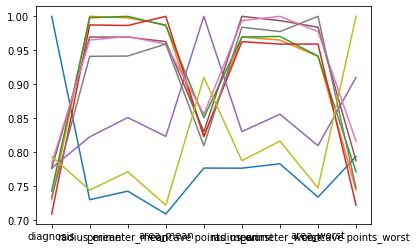

In [19]:
plt.plot(data_n.corr())
plt.show()

__Printing the corelation of each row with the recquired column only__

__(Diagnosis is the column which we want to predict)__

In [20]:
data_n.corr().iloc[:,:1]

,diagnosis
diagnosis,1.000000
radius_mean,0.730029
perimeter_mean,0.742636
area_mean,0.708984
concave points_mean,0.776614
radius_worst,0.776454
perimeter_worst,0.782914
area_worst,0.733825
concave points_worst,0.793566


### Simply plotting whole dataset

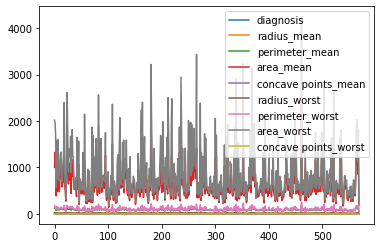

In [21]:
data_n.plot()

__Taking attributes which we want to plot__

In [22]:
x = cancer.diagnosis
y1 = data_n.radius_mean
y2 = data_n.perimeter_mean
y3 = data_n.area_mean
y4 = data_n['concave points_mean']

__Plotting the percentage of the two type of Diagnosis__

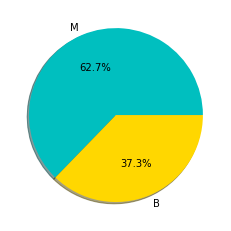

In [23]:
y = x.value_counts()
plt.pie(y,labels=x.unique(),autopct='%1.1f%%',
        shadow=True,colors=['c','gold'])
plt.show()

### Plotting diagnosis with other significant attributes

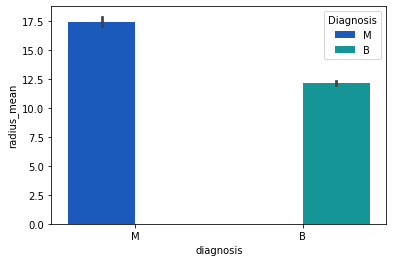

In [24]:
sns.barplot(x,y1,hue=x,palette='winter')
plt.legend(title='Diagnosis')
plt.show()

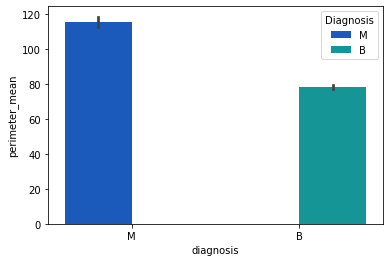

In [25]:
sns.barplot(x,y2,hue=x,palette='winter')
plt.legend(title='Diagnosis')
plt.show()

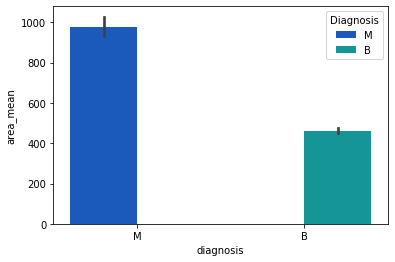

In [26]:
sns.barplot(x,y3,hue=x,palette='winter')
plt.legend(title='Diagnosis')
plt.show()

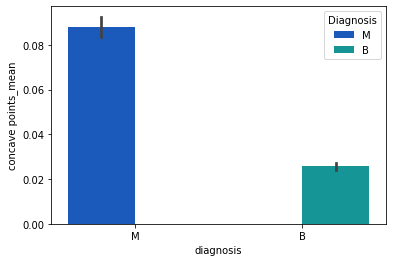

In [27]:
sns.barplot(x,y4,hue=x,palette='winter')
plt.legend(title='Diagnosis')
plt.show()

### Checking outliers for each attribute

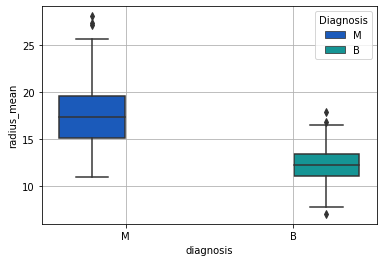

In [28]:
sns.boxplot(x,y1,hue=x,palette='winter')
plt.legend(title='Diagnosis')
plt.grid()
plt.show()

__Radius_Mean:__

B:2 outliers 

M:3 outliers

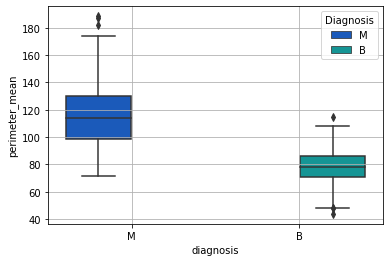

In [29]:
sns.boxplot(x,y2,hue=x,palette='winter')
plt.legend(title='Diagnosis')
plt.grid()
plt.show()

__Perimeter_Mean:__

B:2 outliers 

M:3 outliers

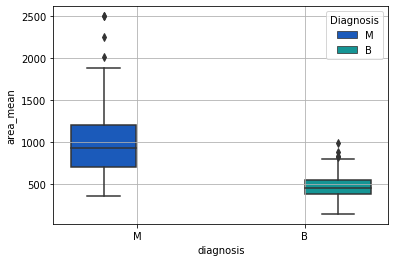

In [30]:
sns.boxplot(x,y3,hue=x,palette='winter')
plt.legend(title='Diagnosis')
plt.grid()
plt.show()

__Area_Mean:__

B:3 outliers 

M:3 outliers

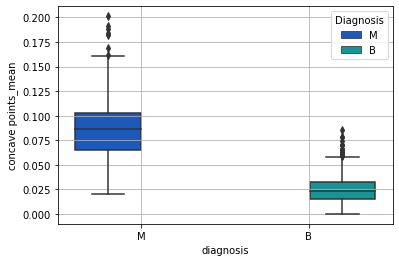

In [31]:
sns.boxplot(x,y4,hue=x,palette='winter')
plt.legend(title='Diagnosis')
plt.grid()
plt.show()

__Concave points_Mean:__

B:6 outliers 

M:8 outliers

### Checking distribution of each attribute

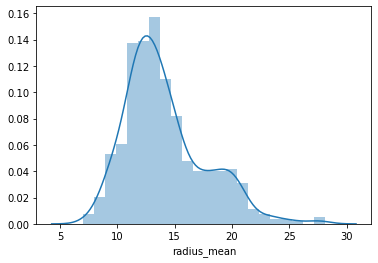

In [32]:
sns.distplot(y1)
plt.show()

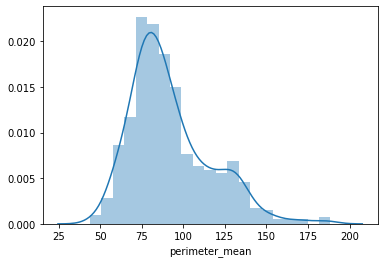

In [33]:
sns.distplot(y2)
plt.show()

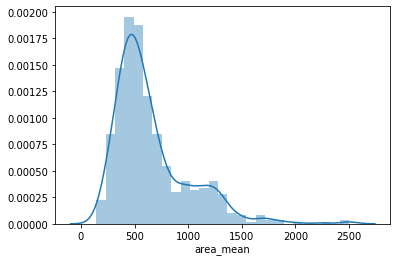

In [34]:
sns.distplot(y3)
plt.show()

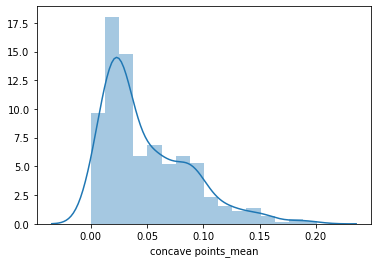

In [35]:
sns.distplot(y4)
plt.show()

### Distribution of each attribute in respect of each other

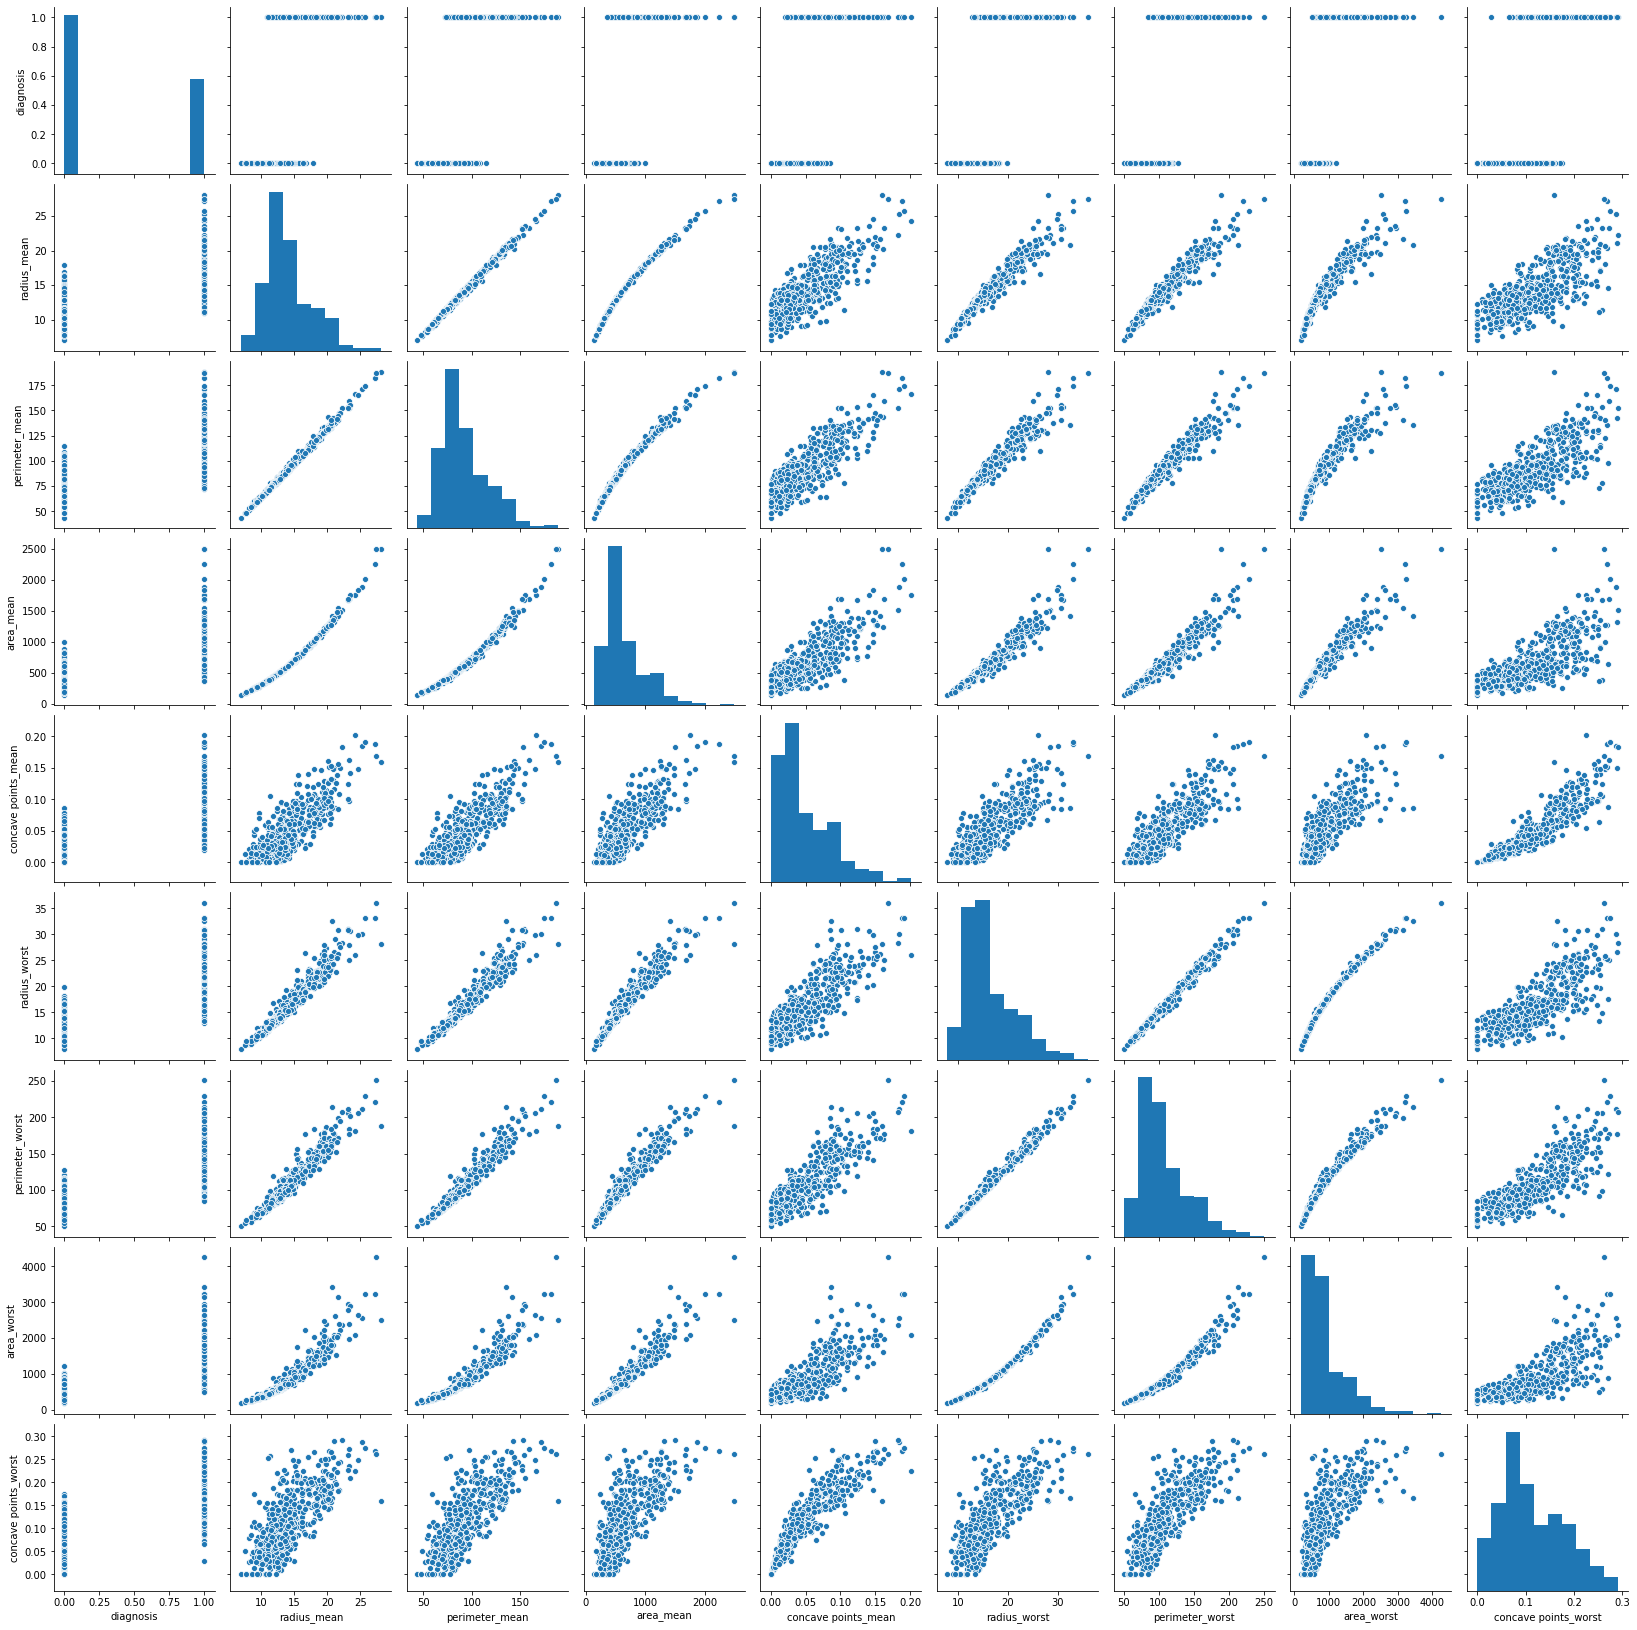

In [36]:
sns.pairplot(data_n)

## Summary

__No attribute is normaly distributted__

__Each attribute is generally postiviley skewed__